Need to import

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as pt
import pandas_profiling

In [2]:
new_df =pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Key Metrics')
new_df_1 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Talking About This(...')
new_df_2 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Stories by act...')
new_df_3 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Consumers by type')
new_df_4 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Consumptions b...')

Merging

In [3]:
final_df = pd.merge(new_df, new_df_2, left_on='Post ID', right_on='Post ID', how='left').drop(['Permalink_y','Post Message_y','Type_y','Posted_y','Audience targeting_y'], axis=1)

In [4]:
final_df = pd.merge(final_df, new_df_4, left_on='Post ID', right_on='Post ID', how='left').drop(['Permalink', 'Post Message', 'Type', 'Posted','Unnamed: 5'],axis=1)

Spliting post date

In [5]:

minute=[]
hour=[]
month=[]
year=[]
quater=[]
dayname_of_week=[]
dayofweek=[]
week_number =[]
for i in final_df['Posted_x']:
    c= i.hour
    minute.append(i.minute)
    hour.append(c)
    month.append(i.month)
    year.append(i.year)
    dayname_of_week.append(i.day_name())
    dayofweek.append(i.day_of_week)
    week_number.append((i.day - 1) // 7 + 1)
    
    if 0 <= c <= 6:
        quater.append('1')
    elif 7<= c <= 12:
        quater.append('2')
    elif 12 <= c <= 18:
        quater.append('3')
    else:
        quater.append('4')

In [6]:
final_df['Month']= month
final_df['Year'] = year
final_df['min']= minute
final_df['hour']=hour
final_df['Quater'] = quater
final_df['Day_Name']= dayname_of_week
final_df['Dayinweek'] =dayofweek
final_df['Week']= week_number


In [7]:
final_df['sentiment'] = final_df["like"] - final_df["Lifetime Negative Feedback"]

In [8]:
quater_1= final_df.groupby(['Quater'])['like'].agg(lambda x : x.sum()).reset_index()

C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


<BarContainer object of 4 artists>

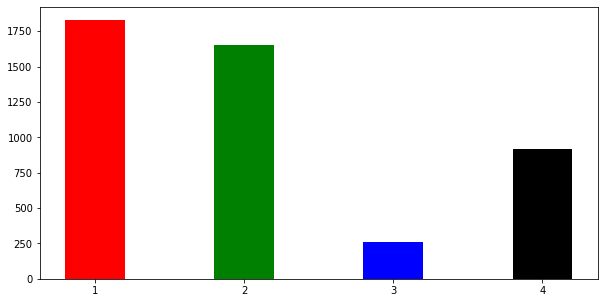

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(quater_1['Quater'], quater_1['like'], color ='rgbkymc',  
        width = 0.4) 

In [10]:
quater_2= final_df.groupby(['Month'])['like'].agg(lambda x : x.sum()).reset_index()

C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  """


<BarContainer object of 8 artists>

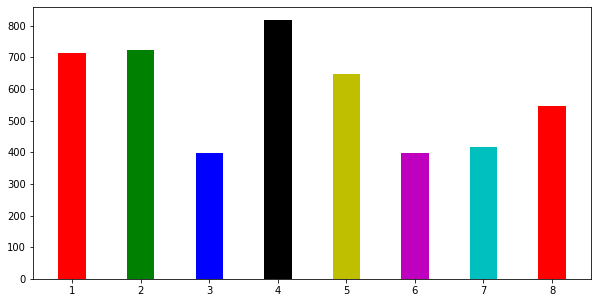

In [11]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(quater_2['Month'], quater_2['like'], color ='rgbkymc',  
        width = 0.4) 

In [12]:
quater_3= final_df.groupby(['Month'])['Posted_x'].agg(lambda x : x.count()).reset_index()

C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  """


<BarContainer object of 8 artists>

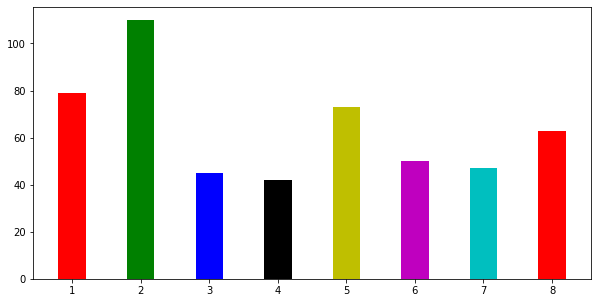

In [13]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(quater_3['Month'], quater_3['Posted_x'], color ='rgbkymc',  
        width = 0.4) 

In [14]:
positive_post = final_df[final_df['sentiment']>0]

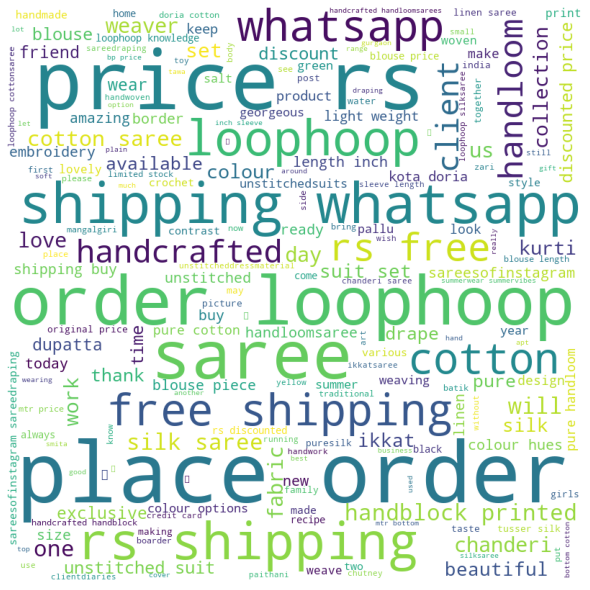

In [15]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
#stopwords.add('whatsapp')

# iterate through the csv file 
for val in positive_post['Post Message_x']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split()
	tokens_pos = val.lower().split()
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [16]:
negative_post = final_df[final_df['sentiment']<0]

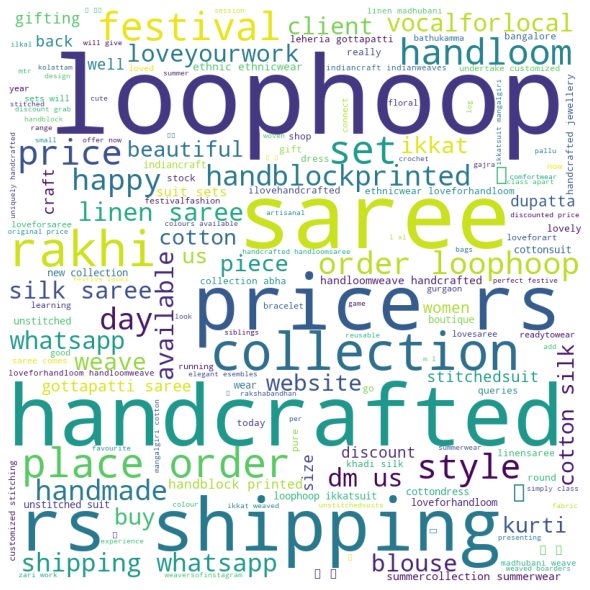

In [17]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
#stopwords.add('whatsapp')

# iterate through the csv file 
for val in negative_post['Post Message_x']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split()
	tokens_neg = val.lower().split()
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [18]:
tokens_pos=[]
for val in positive_post['Post Message_x']:
    val = str(val)
    tokens_pos.extend(val.lower().split())
tokens_neg=[]
for val in negative_post['Post Message_x']:
    val = str(val)
    tokens_neg.extend(val.lower().split())
diff_words = set(tokens_pos)- set(tokens_neg)

In [19]:
final_df.groupby(['Type_x'])['Posted_x'].agg(lambda x : x.count()).reset_index()

,Type_x,Posted_x
0,Link,2
1,Photo,473
2,SharedVideo,6
3,Video,28


In [20]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

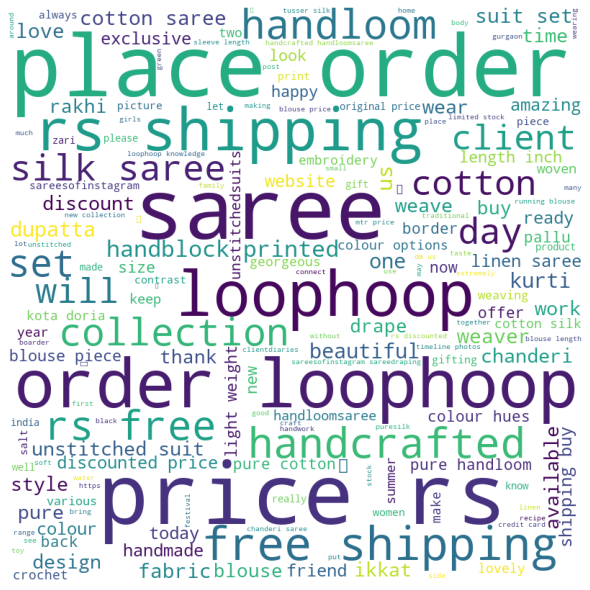

In [21]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add('whatsapp')

# iterate through the csv file 
for val in final_df['Post Message_x']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [22]:
heat_map_df= final_df[['Lifetime Post Paid Reach','like','comment','share','other clicks','photo view','video play','link clicks']]

In [23]:
corr= heat_map_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Lifetime Post Paid Reach,like,comment,share,other clicks,photo view,video play,link clicks
Lifetime Post Paid Reach,1.000000,0.078732,-0.108443,-0.076673,0.006237,-0.034497,-0.285528,0.389784
like,0.078732,1.000000,0.774045,0.945213,0.634804,0.447463,0.220568,-0.521380
comment,-0.108443,0.774045,1.000000,0.949962,0.656970,0.341120,0.661605,nan
share,-0.076673,0.945213,0.949962,1.000000,0.701621,0.320094,nan,nan
other clicks,0.006237,0.634804,0.656970,0.701621,1.000000,0.392961,0.615400,0.175334
photo view,-0.034497,0.447463,0.341120,0.320094,0.392961,1.000000,-0.184263,-0.034205
video play,-0.285528,0.220568,0.661605,nan,0.615400,-0.184263,1.000000,nan
link clicks,0.389784,-0.521380,nan,nan,0.175334,-0.034205,nan,1.000000


In [26]:
import re
def removing_digit(list_val):
    new_post_messgae =[]
    for i in list_val:
        new_post_messgae.append(re.sub('[^A-Za-z]+', ' ', str(i)))
    return new_post_messgae

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords

In [28]:
lst = final_df['Post Message_x'].fillna(value='Missing')

In [30]:
cv= TfidfVectorizer(stop_words ='english')
vect = cv.fit_transform(lst)

In [32]:
dense = vect.todense()
feature_names = cv.get_feature_names()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [33]:
df_tfidf.shape

(509, 3477)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline

In [36]:
df_tfidf['like_post_count'] = final_df['like']

In [37]:
df_tfidf['like_post_count'].fillna((df_tfidf['like_post_count'].mean()), inplace=True)

In [42]:
X = vect#df_tfidf.iloc[:, :-1]
y =df_tfidf['like_post_count']

In [45]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [48]:
test_tsts = ['Showcasing Kota Cotton banaras weaving sarees ....available in various pastel shades ....  Price : Rs 1950 + shipping  Whatsapp 9871155411 to place order.  #loophoop #banarsisilk #kotadoria #sareesofinstagram #sareedraping #drapes #style']

In [50]:
test_dd=removing_digit(test_tsts)

In [52]:
aaaa= cv.transform(test_tsts)

In [54]:
from xverse.ensemble import VotingSelector
clf = VotingSelector()
clf.fit(X, y)

ValueError: The input data must be pandas dataframe. But the input provided is <class 'scipy.sparse.csr.csr_matrix'>

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X, y);

In [58]:
test_dd

['Showcasing Kota Cotton banaras weaving sarees available in various pastel shades Price Rs shipping Whatsapp to place order loophoop banarsisilk kotadoria sareesofinstagram sareedraping drapes style']

In [59]:
rf.predict(aaaa)

array([5.540119])

In [73]:
feature_list = list(df_tfidf.columns)

In [60]:
importances = list(rf.feature_importances_)

In [74]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: adorable             Importance: 0.09
Variable: act                  Importance: 0.03
Variable: family               Importance: 0.03
Variable: loophoop             Importance: 0.03
Variable: amazing              Importance: 0.02
Variable: goodmorning          Importance: 0.02
Variable: picture              Importance: 0.02
Variable: 5300                 Importance: 0.01
Variable: agree                Importance: 0.01
Variable: bhopal               Importance: 0.01
Variable: boat                 Importance: 0.01
Variable: clients              Importance: 0.01
Variable: day                  Importance: 0.01
Variable: drape                Importance: 0.01
Variable: favourite            Importance: 0.01
Variable: friends              Importance: 0.01
Variable: girls                Importance: 0.01
Variable: hai                  Importance: 0.01
Variable: handcrafted          Importance: 0.01
Variable: ikkat                Importance: 0.01
Variable: ikkatdress           Importanc

Variable: handloomlove         Importance: 0.0
Variable: handlooms            Importance: 0.0
Variable: handloomsaree        Importance: 0.0
Variable: handloomsarees       Importance: 0.0
Variable: handloomweave        Importance: 0.0
Variable: handmade             Importance: 0.0
Variable: handmadejewellery    Importance: 0.0
Variable: handmadetoys         Importance: 0.0
Variable: handpainted          Importance: 0.0
Variable: handpainting         Importance: 0.0
Variable: hands                Importance: 0.0
Variable: handwork             Importance: 0.0
Variable: handwoven            Importance: 0.0
Variable: handwritten          Importance: 0.0
Variable: handy                Importance: 0.0
Variable: hanuman              Importance: 0.0
Variable: happened             Importance: 0.0
Variable: happening            Importance: 0.0
Variable: happiness            Importance: 0.0
Variable: happy                Importance: 0.0
Variable: happyclient          Importance: 0.0
Variable: hap

Variable: stick                Importance: 0.0
Variable: sticks               Importance: 0.0
Variable: sticky               Importance: 0.0
Variable: stitch               Importance: 0.0
Variable: stitched             Importance: 0.0
Variable: stitchedblouse       Importance: 0.0
Variable: stitcheddress        Importance: 0.0
Variable: stitchedsets         Importance: 0.0
Variable: stitchedsuit         Importance: 0.0
Variable: stitches             Importance: 0.0
Variable: stitching            Importance: 0.0
Variable: stock                Importance: 0.0
Variable: stockclearance       Importance: 0.0
Variable: stole                Importance: 0.0
Variable: stoles               Importance: 0.0
Variable: stone                Importance: 0.0
Variable: stop                 Importance: 0.0
Variable: stopper              Importance: 0.0
Variable: stopping             Importance: 0.0
Variable: storage              Importance: 0.0
Variable: store                Importance: 0.0
Variable: sto